In [33]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn import neural_network
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [34]:
class NeuralNetwork:
    def __init__(self, hidden_layer_size=12, max_iter=7000, learning_rate=.001):
        self.__weights = []
        self.__hidden_layer_size = hidden_layer_size
        self.__max_iter = max_iter
        self.__learning_rate = learning_rate

    def __softmax(self, x):
        exp_vector = np.exp(x)
        return exp_vector / exp_vector.sum(axis=1, keepdims=True)

    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def __sigmoid_derivative(self, x):
        return self.__sigmoid(x) * (1 - self.__sigmoid(x))

    def fit(self, x, y):
        no_features = len(x[0])
        no_outputs = len(set(y))
        new_y = np.zeros((len(y), no_outputs))
        for i in range(len(y)):
            new_y[i, y[i]] = 1
        y = new_y
        weight_ih = np.random.rand(no_features, self.__hidden_layer_size)  # input X hidden
        coefficient_ih = np.random.randn(self.__hidden_layer_size)
        weight_ho = np.random.rand(self.__hidden_layer_size, no_outputs)  # hidden  X output
        coefficient_ho = np.random.randn(no_outputs)
        for epoch in range(self.__max_iter):
            y_ih = np.dot(x, weight_ih) + coefficient_ih  # forward propagation
            y_ih_sigmoid = self.__sigmoid(y_ih)
            y_output = np.dot(y_ih_sigmoid, weight_ho) + coefficient_ho
            y_output_softmax = self.__softmax(y_output)
            error = y_output_softmax - y  # back propagation
            error_weight_ho = np.dot(y_ih_sigmoid.T, error)
            error_coefficient_ho = error
            error_dah = np.dot(error, weight_ho.T)
            dah_dzh = self.__sigmoid_derivative(y_ih)
            dzh_dwh = x
            error_weight_ih = np.dot(dzh_dwh.T, dah_dzh * error_dah)
            error_coefficient_ih = error_dah * dah_dzh
            weight_ih -= self.__learning_rate * error_weight_ih
            coefficient_ih -= self.__learning_rate * error_coefficient_ih.sum(axis=0)
            weight_ho -= self.__learning_rate * error_weight_ho
            coefficient_ho -= self.__learning_rate * error_coefficient_ho.sum(axis=0)
        self.__weights = [weight_ih, coefficient_ih, weight_ho, coefficient_ho]

    def predict(self, x):
        weight_ih, coefficient_ih, weight_ho, coefficient_ho = self.__weights
        y_ih = np.dot(x, weight_ih) + coefficient_ih
        y_ih_sigmoid = self.__sigmoid(y_ih)
        y_output = np.dot(y_ih_sigmoid, weight_ho) + coefficient_ho
        y_output_softmax = self.__softmax(y_output)
        computed_output = [list(output).index(max(output)) for output in y_output_softmax]
        return computed_output

In [35]:
def load_data_flowers():
    data = load_iris()
    input_data = data['data']
    output_data = data['target']
    outputs_name = data['target_names']
    feature_names = list(data['feature_names'])
    feature_1 = [feat[feature_names.index('sepal length (cm)')] for feat in input_data]
    feature_2 = [feat[feature_names.index('sepal width (cm)')] for feat in input_data]
    feature_3 = [feat[feature_names.index('petal length (cm)')] for feat in input_data]
    feature_4 = [feat[feature_names.index('petal width (cm)')] for feat in input_data]
    input_data = [[feat[feature_names.index('sepal length (cm)')],
                   feat[feature_names.index('sepal width (cm)')],
                   feat[feature_names.index('petal length (cm)')],
                   feat[feature_names.index('petal width (cm)')]] for feat in input_data]
    return input_data, output_data, outputs_name, feature_1, feature_2, feature_3, feature_4, feature_names


def load_data_digit():
    data = load_digits()
    input_data = data.images
    output_data = data['target']
    outputs_name = data['target_names']
    return input_data, output_data, outputs_name


In [36]:
def plot_data_four_features(input_data, output_data, feature_names, title=None):
    x = [i[0] for i in input_data]
    y = [i[1] for i in input_data]
    z = [i[2] for i in input_data]
    v = [i[3] for i in input_data]
    figure = px.scatter_3d(x=x, y=y, z=z, symbol=v, color=output_data, title=title,
                           labels=dict(x=feature_names[0], y=feature_names[1], z=feature_names[2],
                                       symbol=feature_names[3], color="Type"))
    figure.update_layout(legend=dict(orientation="v", yanchor='top', xanchor="right"))
    figure.show()


def plot_histogram_feature(feature, variableName):
    plt.hist(feature, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


def plot_histogram_data(output_data, outputs_name, title):
    plt.hist(output_data, 10)
    plt.title('Histogram of ' + title)
    plt.xticks(np.arange(len(outputs_name)), outputs_name)
    plt.show()


In [37]:
def train_and_test(input_data, output_data):
    indexes = [i for i in range(len(input_data))]
    train_sample = np.random.choice(indexes, int(0.8 * len(input_data)), replace=False)
    test_sample = [i for i in indexes if i not in train_sample]
    train_inputs = [input_data[i] for i in train_sample]
    train_outputs = [output_data[i] for i in train_sample]
    test_inputs = [input_data[i] for i in test_sample]
    test_outputs = [output_data[i] for i in test_sample]
    return train_inputs, train_outputs, test_inputs, test_outputs

In [38]:
def normalisation(train_data, test_data):
    scaler = StandardScaler()
    if not isinstance(train_data[0], list):
        trainData = [[d] for d in train_data]
        testData = [[d] for d in test_data]
        scaler.fit(trainData)
        normalisedTrainData = scaler.transform(trainData)
        normalisedTestData = scaler.transform(testData)
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(train_data)
        normalisedTrainData = scaler.transform(train_data)
        normalisedTestData = scaler.transform(test_data)
    return normalisedTrainData, normalisedTestData


In [39]:
def classifier_by_tool(train_inputs, train_outputs, test_inputs, test_outputs):
    classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=100, solver='sgd',
                                              verbose=0, random_state=1, learning_rate_init=.1)
    classifier.fit(train_inputs, train_outputs)
    computed_outputs = classifier.predict(test_inputs)
    print('Accuracy by tool:', classifier.score(test_inputs, test_outputs))
    return computed_outputs


def classifier_by_me(train_inputs, train_outputs, test_inputs):
    classifier = NeuralNetwork(hidden_layer_size=10)
    classifier.fit(np.array(train_inputs), np.array(train_outputs))
    computed_outputs = classifier.predict(test_inputs)
    return computed_outputs


In [40]:
from sklearn.metrics import confusion_matrix as cm

def evaluate(test_outputs, computed_labels, output_names):
    confusion_matrix_calculated = cm(test_outputs, computed_labels)
    acc = sum([confusion_matrix_calculated[i][i] for i in range(len(output_names))]) / len(test_outputs)
    prec = {}
    rec = {}
    for i in range(len(output_names)):
        prec[output_names[i]] = confusion_matrix_calculated[i][i] / sum([confusion_matrix_calculated[j][i]
                                                                         for j in range(len(output_names))])
        rec[output_names[i]] = confusion_matrix_calculated[i][i] / sum([confusion_matrix_calculated[i][j]
                                                                        for j in range(len(output_names))])
    print('Accuracy: ', acc)
    print('Precision: ', prec)  # TP/TP+FP - cate din cele gasite sunt relevante
    print('Recall: ', rec)  # TP/TP+FN - cate  relevante au fost gasite
    return confusion_matrix_calculated


In [41]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                 horizontalalignment='center',
                 color='white' if cm[row, column] > thresh else 'black')
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [42]:
def flatten_data(train_data, test_data):
    def flatten(mat):
        x = []
        for line in mat:
            for el in line:
                x.append(el)
        return x
    train_data = [flatten(data) for data in train_data]
    test_data = [flatten(data) for data in test_data]
    return train_data, test_data


IRIS


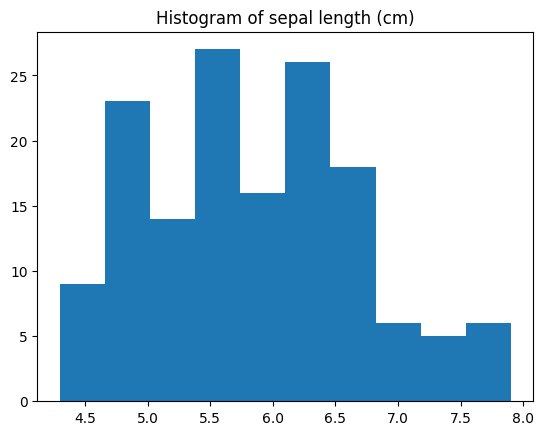

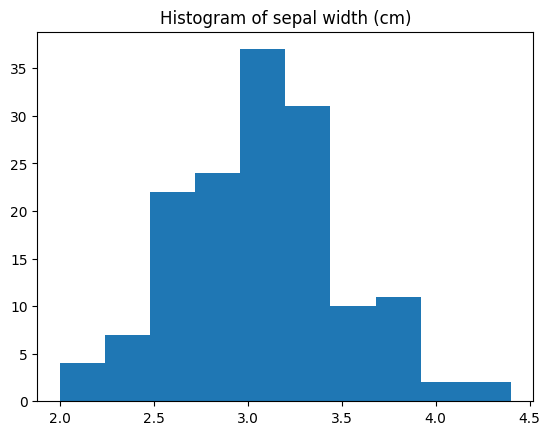

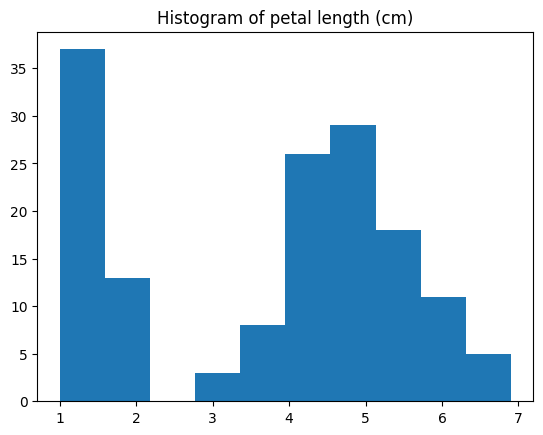

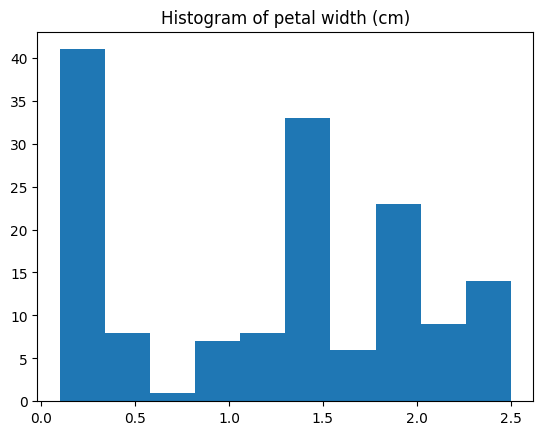

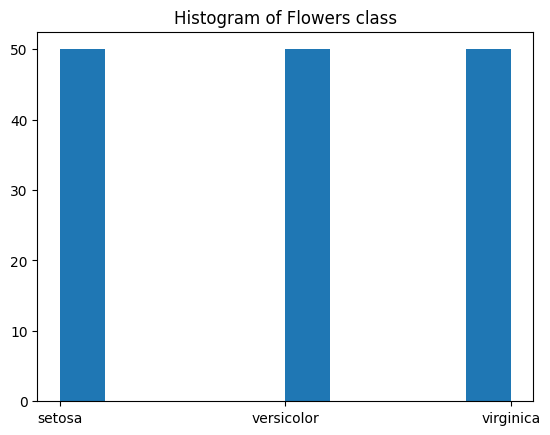

/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Accuracy by tool: 0.9
Computed: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
Real:     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]

Computed by me: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
Real:           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
Accuracy:  0.9333333333333333
Precision:  {'setosa': 1.0, 'versicolor': 1.0, 'virginica': 0.75}
Recall:  {'setosa': 1.0, 'versicolor': 0.8333333333333334, 'virginica': 1.0}


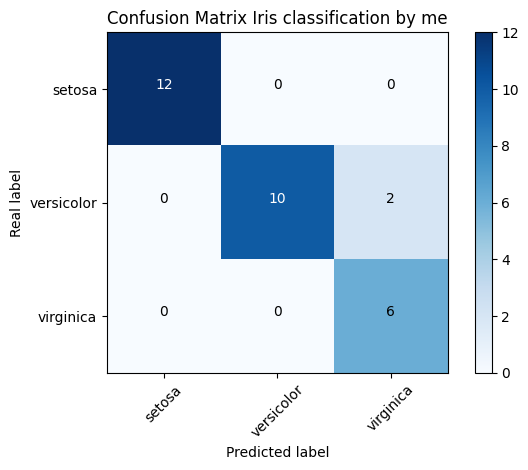



DIGITS


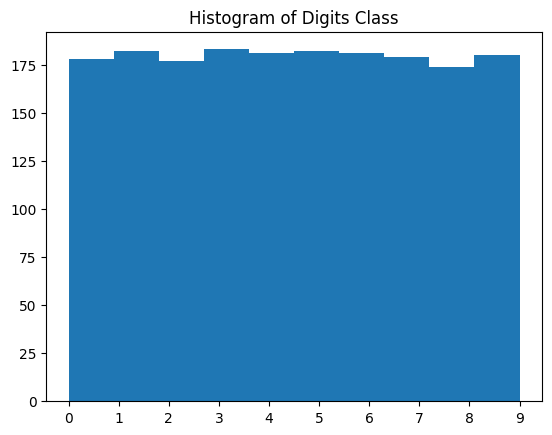

/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Accuracy by tool: 0.9166666666666666
Computed: [5, 2, 1, 2, 5, 6, 1, 6, 0, 2, 3, 4, 6, 6, 6, 5, 6, 1, 7, 7, 8, 2, 3, 4, 5, 0, 5, 5, 9, 8, 1, 2, 3, 6, 9, 8, 3, 8, 4, 3, 8, 7, 8, 2, 4, 8, 5, 1, 9, 5, 7, 1, 0, 8, 1, 3, 6, 0, 2, 7, 0, 7, 7, 4, 7, 2, 5, 4, 8, 3, 9, 4, 0, 5, 9, 4, 7, 0, 2, 7, 1, 6, 6, 0, 5, 7, 6, 3, 4, 2, 1, 9, 6, 0, 5, 5, 6, 8, 9, 9, 4, 5, 5, 5, 9, 3, 8, 7, 7, 1, 0, 7, 8, 3, 3, 4, 6, 6, 7, 0, 5, 5, 4, 4, 0, 2, 2, 2, 3, 3, 7, 3, 9, 8, 0, 3, 9, 1, 8, 2, 8, 0, 2, 4, 5, 2, 4, 8, 3, 6, 7, 1, 3, 6, 4, 5, 9, 0, 6, 1, 1, 8, 1, 2, 9, 3, 2, 5, 8, 9, 9, 2, 3, 7, 9, 0, 0, 2, 3, 1, 4, 3, 7, 5, 4, 2, 5, 4, 9, 0, 5, 0, 1, 7, 8, 3, 8, 0, 7, 8, 1, 2, 3, 4, 6, 6, 9, 5, 5, 6, 8, 6, 0, 6, 5, 5, 5, 8, 9, 0, 1, 7, 9, 0, 3, 4, 9, 9, 5, 5, 0, 5, 2, 2, 2, 4, 6, 1, 0, 1, 3, 7, 5, 4, 5, 8, 8, 8, 0, 9, 3, 9, 0, 3, 4, 7, 2, 7, 5, 0, 9, 1, 0, 8, 2, 7, 6, 4, 9, 1, 3, 9, 5, 9, 6, 5, 7, 5, 5, 4, 1, 6, 3, 7, 0, 4, 5, 9, 8, 1, 5, 3, 5, 0, 2, 4, 9, 7, 1, 4, 0, 9, 2, 9, 8, 9, 1, 2, 8, 4, 8, 7, 6, 6, 9, 2, 0, 2

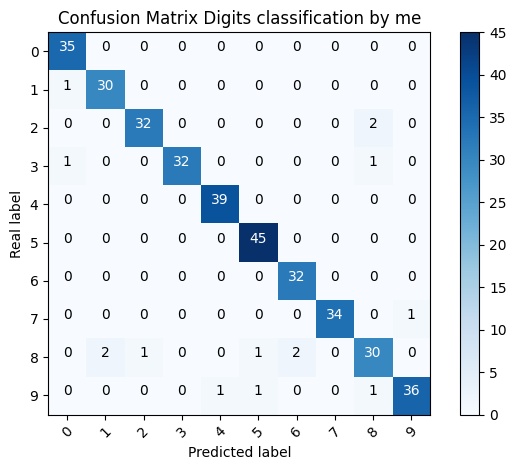

In [45]:
print("IRIS")
inputs, outputs, outputNames, feature1, feature2, feature3, feature4, featureNames = load_data_flowers()
plot_data_four_features(inputs, outputs, featureNames, "Initial data for flowers")
plot_histogram_feature(feature1, featureNames[0])
plot_histogram_feature(feature2, featureNames[1])
plot_histogram_feature(feature3, featureNames[2])
plot_histogram_feature(feature4, featureNames[3])
plot_histogram_data(outputs, outputNames, 'Flowers class')
trainInputs, trainOutputs, testInputs, testOutputs = train_and_test(inputs, outputs)
trainInputs, testInputs = normalisation(trainInputs, testInputs)
plot_data_four_features(trainInputs, trainOutputs, featureNames, "Normalised flowers' data")
computedOutputs = classifier_by_tool(trainInputs, trainOutputs, testInputs, testOutputs)
print('Computed:', list(computedOutputs))
print('Real:    ', testOutputs)
print()
computedOutputsByMe = classifier_by_me(trainInputs, trainOutputs, testInputs)
print('Computed by me:', computedOutputsByMe)
print('Real:          ', testOutputs)
confusion_matrix_by_me = evaluate(np.array(testOutputs), np.array(computedOutputsByMe), outputNames)
plot_confusion_matrix(confusion_matrix_by_me, outputNames, "Iris classification by me")

print('\n\nDIGITS')
inputs, outputs, outputNames = load_data_digit()
plot_histogram_data(outputs, outputNames, 'Digits Class')
trainInputs, trainOutputs, testInputs, testOutputs = train_and_test(inputs, outputs)
trainInputs, testInputs = flatten_data(trainInputs, testInputs)
trainInputs, testInputs = normalisation(trainInputs, testInputs)
computedOutputs = classifier_by_tool(trainInputs, trainOutputs, testInputs, testOutputs)
print('Computed:', list(computedOutputs))
print('Real:    ', testOutputs)
print()
computedOutputsByMe = classifier_by_me(trainInputs, trainOutputs, testInputs)
print('Computed by me:', computedOutputsByMe)
print('Real:          ', testOutputs)
confusion_matrix_by_me = evaluate(np.array(testOutputs), np.array(computedOutputsByMe), outputNames)
plot_confusion_matrix(confusion_matrix_by_me, outputNames, "Digits classification by me")

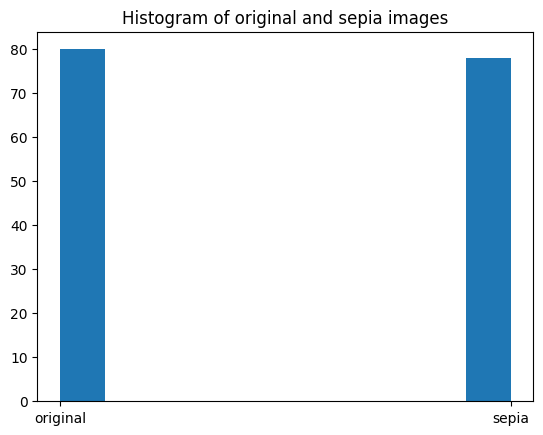

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1]
[0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1
 0 0 0]
Accuracy:  0.45
Precision:  {'original': 0.2, 'sepia': 0.4857142857142857}
Recall:  {'original': 0.05263157894736842, 'sepia': 0.8095238095238095}


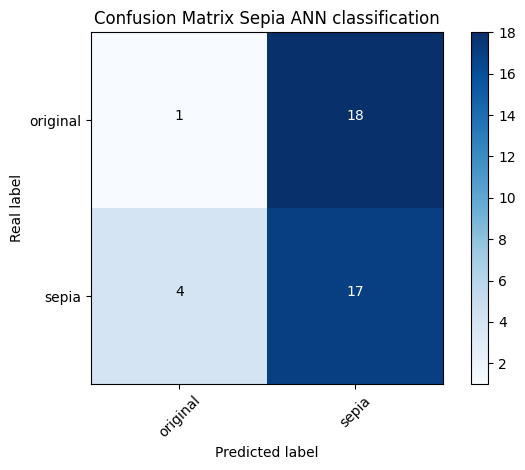

In [46]:
from PIL import Image
from sklearn import neural_network


def process_image(path):
    img = Image.open(path)
    img = np.asarray(img)
    processed = []
    for i in img:
        processed += list(i)
    return np.ravel(processed) / 255.0


def process_folder():
    inputs_data = []
    outputs_data = []
    for i in range(1, 100):
        inputs_data.append(process_image('data/original/' + str(i) + '.jpg'))
        outputs_data.append(0)
        inputs_data.append(process_image('data/sepia/' + str(i) + '-sepia.jpg'))
        outputs_data.append(1)
    return inputs_data, outputs_data


def train_by_tool(train_inputs, train_outputs, test_inputs):
    classifier = neural_network.MLPClassifier(hidden_layer_sizes=(12, 25, 12), max_iter=10000)
    classifier.fit(train_inputs, train_outputs)
    computed_outputs = classifier.predict(test_inputs)
    return computed_outputs


if __name__ == '__main__':
    outputNames = ['original', 'sepia']
    imgSize = 64
    inputData, outputData = process_folder()
    trainInputs, trainOutputs, testInputs, testOutputs = train_and_test(inputData, outputData)
    trainInputs = np.array(trainInputs)
    trainOutputs = np.array(trainOutputs)
    testInputs = np.array(testInputs)
    testOutputs = np.array(testOutputs)
    plot_histogram_data(trainOutputs, outputNames, 'original and sepia images')
    computedOutputs = train_by_tool(trainInputs, trainOutputs, testInputs)
    print(computedOutputs)
    print(testOutputs)
    confusion_matrix = evaluate(testOutputs, computedOutputs, outputNames)
    plot_confusion_matrix(confusion_matrix, outputNames, "Sepia ANN classification")

/var/folders/ry/98472m9j33g4pk1cqrwpqx9w0000gn/T/ipykernel_30790/1004588739.py:22: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



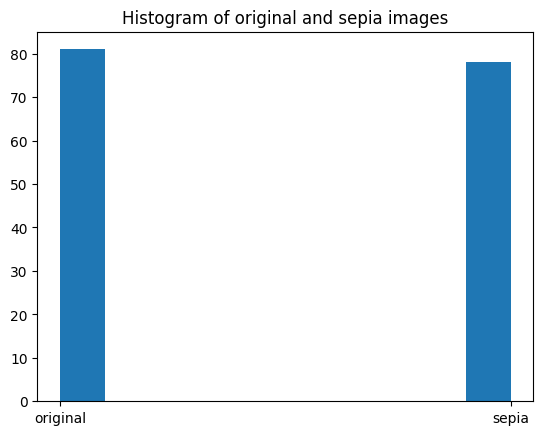

/Users/alexandrusirbu/Library/Python/3.9/lib/python/site-packages/tensorflow/python/keras/backend.py:4927: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"

2023-05-07 21:28:08.633932: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-07 21:28:08.677607: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_2/kernel/Assign' id:98 op device:{requested: '', assigned: ''} def:{{{node conv2d_2/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_2/kernel, conv2d_2/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Train on 159 samples, validate on 40 samples
Epoch 1/35
159/159 [==============================] - 0s 2ms/sample - loss: 0.8065 - accuracy: 0.4717 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 2/35
159/159 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5535

/Users/alexandrusirbu/Library/Python/3.9/lib/python/site-packages/tensorflow/python/keras/engine/training.py:2455: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.

2023-05-07 21:28:08.949813: W tensorflow/c/c_api.cc:300] Operation '{name:'loss/mul' id:395 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_3_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


159/159 [==============================] - 0s 1ms/sample - loss: 0.6921 - accuracy: 0.5535 - val_loss: 0.7099 - val_accuracy: 0.4750
Epoch 3/35
159/159 [==============================] - 0s 1ms/sample - loss: 0.6659 - accuracy: 0.5346 - val_loss: 0.6416 - val_accuracy: 0.6750
Epoch 4/35
159/159 [==============================] - 0s 1ms/sample - loss: 0.6169 - accuracy: 0.7610 - val_loss: 0.5552 - val_accuracy: 0.9250
Epoch 5/35
159/159 [==============================] - 0s 1ms/sample - loss: 0.5367 - accuracy: 0.8491 - val_loss: 0.4564 - val_accuracy: 0.9250
Epoch 6/35
159/159 [==============================] - 0s 1ms/sample - loss: 0.4531 - accuracy: 0.8616 - val_loss: 0.3529 - val_accuracy: 0.9250
Epoch 7/35
159/159 [==============================] - 0s 1ms/sample - loss: 0.3625 - accuracy: 0.8868 - val_loss: 0.2689 - val_accuracy: 0.9000
Epoch 8/35
159/159 [==============================] - 0s 1ms/sample - loss: 0.3017 - accuracy: 0.9119 - val_loss: 0.2171 - val_accuracy: 0.9750
Epo

2023-05-07 21:28:15.504514: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_3/Softmax' id:339 op device:{requested: '', assigned: ''} def:{{{node dense_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


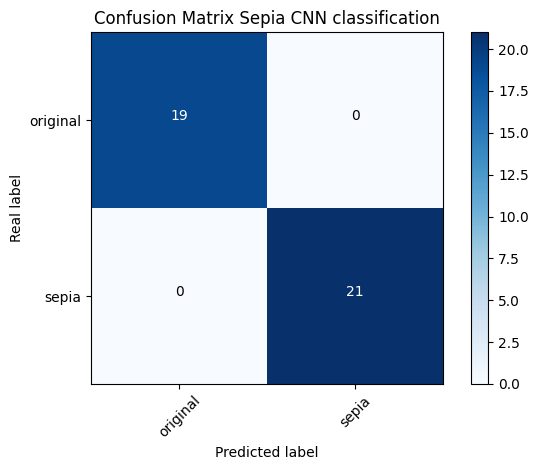

In [48]:
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.python.keras.losses import SparseCategoricalCrossentropy
from tensorflow.python.keras.optimizer_v1 import adam
from tensorflow.python.keras.layers import MaxPool2D, Dropout, Flatten, Dense, Conv2D
from tensorflow.python.keras import Sequential
import cv2
import os


def process_folder(directory, img_size):
    data = []
    for label in outputNames:
        path = os.path.join(directory, label)
        class_num = outputNames.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


def train_and_test_cnn(data):
    indexes = [i for i in range(len(data))]
    train_sample = np.random.choice(indexes, int(0.8 * len(data)), replace=False)
    test_sample = [i for i in indexes if i not in train_sample]
    train = [data[i] for i in train_sample]
    test = [data[i] for i in test_sample]
    return train, test


def inputs_outputs_normalisation(train, test, img_size):
    train_input = []
    train_output = []
    test_input = []
    test_output = []
    for feature, label in train:
        train_input.append(feature)
        train_output.append(label)
    for feature, label in test:
        test_input.append(feature)
        test_output.append(label)
    train_input = np.array(train_input) / 255.0
    test_input = np.array(test_input) / 255.0
    train_input.reshape(-1, img_size, img_size, 1)
    train_output = np.array(train_output)
    test_input.reshape(-1, img_size, img_size, 1)
    test_output = np.array(test_output)
    return train_input, train_output, test_input, test_output


def train_by_tool(train_input, train_output, test_input, test_output, img_size):
    model = Sequential()
    model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size, 3)))  # first layer
    model.add(MaxPool2D())
    model.add(Conv2D(64, 3, padding="same", activation="relu"))  # second layer
    model.add(MaxPool2D())
    model.add(Dropout(0.4))
    model.add(Flatten())  # output layer
    model.add(Dense(2, activation="softmax"))
    opt = Adam(learning_rate=.001)
    model.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    model.fit(train_input, train_output, validation_data=(test_input, test_output), epochs=35)
    return model.predict(x=test_input)


if __name__ == '__main__':
    outputNames = ['original', 'sepia']
    imgSize = 64
    totalData = process_folder('data', imgSize)
    trainData, testData, = train_and_test_cnn(totalData)
    trainInput, trainOutput, testInput, testOutput = inputs_outputs_normalisation(trainData, testData, imgSize)
    plot_histogram_data(trainOutput, outputNames, "original and sepia images")
    computedOutputs = train_by_tool(trainInput, trainOutput, testInput, testOutput, imgSize)
    computedOutputs = [list(elem).index(max(list(elem))) for elem in computedOutputs]
    print(computedOutputs)
    confusion_matrix = evaluate(testOutput, computedOutputs, outputNames)
    plot_confusion_matrix(confusion_matrix, outputNames, "Sepia CNN classification")
